# Preliminary Imports

In [171]:
import numpy as np
import pandas as pd

# Step 1: Download the necessary files directly from the github repository used for Project 1

I wrote my own fetch function so I can use it for different files from the original repo.

In [172]:
import pandas as pd
import requests
import io
import pathlib

def fetch_and_save(dataset_name, write_sep="\t"):
  url = f"https://raw.githubusercontent.com/uc-datascience/Project1/main/{dataset_name}"
  dataset = requests.get(url)
  dataset.raise_for_status()
  data = pd.read_csv(io.StringIO(dataset.text), sep="\t")
  data.to_csv(dataset_name, sep=write_sep, index=False)
  return data
data = fetch_and_save("TCGA_breast_cancer_LumA_vs_Basal_PAM50.tsv")

# Step 2: Perform the necessary parsing to get what you need in order

Re-wrote as a function for later use

In [173]:
def get_X_y(data):
  # removed needless removal of index
  data = data.set_index(data.columns[0])
  X = data.iloc[1:, 1:].T  # Features (gene expression values)
  y = data.iloc[0, 1:]  # Target classes
  classes = np.unique(y)
  class_map = {}
  for index, item in enumerate(classes):
    class_map[item] = index
  y = y.map(class_map)
  return X.astype(float), y, class_map

X, y, class_map = get_X_y(data)

In [174]:
X

sample_id,NAT1,BIRC5,BAG1,BCL2,BLVRA,CCNB1,CCNE1,CDC6,CDC20,CDH3,...,PHGDH,GPR160,UBE2T,CXXC5,ANLN,CEP55,ACTR3B,MLPH,NUF2,TMEM45B
TCGA-A8-A08H-01A-21R-A00Z-07,7.20520,8.53294,10.33150,9.25682,10.30320,9.96803,6.39755,8.40945,9.55561,9.81233,...,9.50432,8.66672,7.69529,9.15226,10.40630,9.04563,6.29488,9.81946,7.53126,5.43699
TCGA-A8-A07U-01A-11R-A034-07,5.12902,9.01439,10.50270,8.77254,9.94430,10.07730,10.08320,9.02709,9.96002,13.18220,...,9.80741,6.77320,8.56121,8.91322,11.19460,9.96350,7.22663,7.64791,10.45280,5.38517
TCGA-BH-A0E0-01A-11R-A056-07,4.82895,8.74525,10.53460,8.37459,10.58330,11.35070,10.11010,8.82195,10.91960,8.14850,...,11.71420,5.90954,9.08088,9.11933,11.26540,10.19580,10.31790,7.52211,10.70310,5.20765
TCGA-A2-A04T-01A-21R-A034-07,4.79575,10.17280,9.39239,8.62946,8.21056,10.98610,9.67320,9.38211,10.83030,12.79000,...,12.04670,6.40014,10.28380,5.99078,10.53810,9.97684,9.49348,5.24260,9.95325,1.25755
TCGA-BH-A18K-01A-11R-A12D-07,10.11330,8.38562,10.25080,9.31121,11.20390,10.72090,7.38449,8.23001,10.14480,9.03652,...,9.15508,9.91168,9.30879,9.46949,9.88708,8.72618,7.87922,12.02270,8.75839,7.57069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AN-A0XV-01A-11R-A109-07,10.45540,7.66668,10.70850,12.01910,11.03790,10.01030,4.64723,8.15038,8.95353,8.68803,...,10.64010,10.85980,8.25288,9.14162,9.62070,8.63461,7.47676,12.86840,7.87199,6.55071
TCGA-B6-A0RP-01A-21R-A084-07,13.62320,6.15863,10.28100,10.78100,11.16310,8.14069,3.80524,6.47995,7.28704,8.25951,...,8.04625,11.01240,6.94598,9.27137,7.66054,7.03117,7.77516,13.58860,6.52131,9.16375
TCGA-B6-A0X7-01A-11R-A10J-07,10.53330,6.69209,10.59990,11.82490,8.80613,8.75316,3.54125,6.69548,7.76108,8.46440,...,8.97606,10.46450,7.77923,9.50251,7.63220,6.95300,7.93710,13.23520,6.54450,7.72875
TCGA-BH-A0HK-01A-11R-A056-07,11.92220,8.26247,10.60690,11.31900,9.92719,8.89394,4.95567,7.76166,8.22501,8.84188,...,9.55621,12.40120,8.28229,7.20428,8.52239,7.84337,7.52218,13.87310,7.21966,9.78624


# Step 3: Use logistic regression to learn and asses classification models within cross-validation

In [175]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import warnings

# Suppress warnings from logistic regression
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.linear_model")


# Test logistic regression with a simple split into training and test sets
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Test logistic regression using cross-validation
# Perform 5-fold cross-validation

# Create a StratifiedKFold object with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Compute mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")


Accuracy: 0.9848484848484849
Mean Accuracy: 0.9632634032634033
Standard Deviation: 0.015673351828567793


# Step 4
 Use a simple feed-forward neural network to train and assess classification models within cross-validation

In [176]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.neural_network")


# Create a StratifiedKFold object with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create and train a neural network model with one hidden layer (10 nodes)
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42)

# Perform stratified cross-validation
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Compute mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")


Mean Accuracy: 0.9723543123543124
Standard Deviation: 0.017973584929489906


# Step 5
Play with meta-parameters in the model, including different activation functions, more hidden layers, more or less nodes in hidden layers to change the complexity of the model and its impact on the results.

In [177]:
# we can modify the cross_val_score line to use a grid_search instead
# to which we can provide many possible metaparameters
from sklearn.model_selection import GridSearchCV

# Parameters to test
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (100,), (10, 10), (20, 10), (10, 20), (100, 100), (100, 100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# replace model with one that doesn't have parameters initialized
# except for the ones that should stay constant

model = MLPClassifier(solver='adam', random_state=42)

# Replaces cross_val_score
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2   # Increase verbosity to see progress
)


grid_search.fit(X, y)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (20,), (50,), (100,),
                                                (10, 10), (20, 10), (10, 20),
                                                (100, 100), (100, 100, 100)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=2)

In [178]:
# we can then print the best parameters
print(f"Best Params: {grid_search.best_params_}")

# And the best cross-validation score
print(f"Best Cross-validation: {grid_search.best_score_}")

# To get the best accuracy and std
best_index = grid_search.best_index_
best_accuracy = grid_search.cv_results_["mean_test_score"][best_index]
best_std = grid_search.cv_results_["std_test_score"][best_index]
print(f"Accuracy: {best_accuracy}")
print(f"Std: {best_std}")




Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01}
Best Cross-validation: 0.9815850815850815
Accuracy: 0.9815850815850815
Std: 0.01508358449509978


# Step 6:
 Note that Basal-like vs. Luminal A subtype classification is an easy task as these two classes represent two most distinct molecular subtypes of breast cancer. Note also that the problem is further simplified by using an oracle provided magic set of 50 features (genes) that separate these subtypes very well. Following Project 1, expand the code to perform both logistic regression and neural network training and assessment within cross-validation on the more challenging task of predicting ER status using all genes with t-test based feature selection to limit the set of genes to 1000, 500, 100, and compare the results. Make sure that your feature selection is done on the training subsets only!

In [179]:
ER_data = fetch_and_save("TCGA_breast_cancer_ERstatus_allGenes.txt")
ER_data_small = fetch_and_save("TCGA_breast_cancer_ERpositive_vs_ERnegative_PAM50.tsv")

<ipython-input-172-8ed46047a9f4>:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

## Set up t-test feature selection

In [180]:
from scipy.stats import ttest_ind
from sklearn.base import BaseEstimator, TransformerMixin

class t_test_features(BaseEstimator, TransformerMixin):
  def __init__(self, N=None):
    self.N = N

  def fit(self, X, y): # only works for binary labels
    left = X[y == 0] # left
    right = X[y == 1] # right

    stats, p_values = ttest_ind(left, right, equal_var=False)
    self.stats = stats
    self.p_values = p_values
    return self

  def transform(self, X):
    X = X[X.columns[np.argsort(self.p_values)]] # sorts columns (genes) in decending significance/acending p_value
    if self.N is not None:
      return X[X.columns[0:self.N]]
    return X

# testing
#X, y, class_map = get_X_y(ER_data_small)
#t_test_features(N=10).fit_transform(X, y)


## Generic model function

In [181]:
from sklearn.pipeline import Pipeline


def test_model(data, N_train_features, model, scoring="accuracy"):
  pipeline = Pipeline([("feature_selection", t_test_features(N=N_train_features)),
            ("classification", model)
            ])
  X, y, class_map = get_X_y(data)
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(pipeline, X, y, cv=skf, scoring=scoring)
  return scores, pipeline


scores, _ = test_model(ER_data, 100, MLPClassifier(solver='adam', random_state=42))

print(f"mean accuracy: {np.mean(scores)}")



mean accuracy: 0.9533653846153847


## Test models with 100, 500, 1000 genes

In [196]:
meanscores = {"logistic": {}, "MLPclassifier": {}}
stdscores = {"logistic": {}, "MLPclassifier": {}}

for i in range(100, 1100, 100): # just did every 100 (so 100, 500, 1000 are included)
  print(f"Model Stats at {i} genes -------------------------------")
  scores, _ = test_model(ER_data, i, LogisticRegression(random_state=42))
  print(f"Logistic Regression:")
  print(f"Mean Accuracy: {np.mean(scores)}")
  meanscores["logistic"][i] = np.mean(scores)
  stdscores["logistic"][i] = np.std(scores)
  print(f"Mean Std: {np.std(scores)}")
  scores, _ = test_model(ER_data, i, (MLPClassifier(solver='adam', random_state=42)))
  print(f"MLPClassifier:")
  print(f"Mean Accuracy: {np.mean(scores)}")
  print(f"Mean Std: {np.std(scores)}")
  meanscores["MLPclassifier"][i] = np.mean(scores)
  stdscores["MLPclassifier"][i] = np.std(scores)

Model Stats at 100 genes -------------------------------
Logistic Regression:
Mean Accuracy: 0.9316826923076924
Mean Std: 0.021010440487230535
MLPClassifier:
Mean Accuracy: 0.9533653846153847
Mean Std: 0.026090757477306895
Model Stats at 200 genes -------------------------------
Logistic Regression:
Mean Accuracy: 0.9439903846153846
Mean Std: 0.03786008088808147
MLPClassifier:
Mean Accuracy: 0.9534134615384616
Mean Std: 0.01387283753605495
Model Stats at 300 genes -------------------------------
Logistic Regression:
Mean Accuracy: 0.9533653846153847
Mean Std: 0.026090757477306895
MLPClassifier:
Mean Accuracy: 0.9564903846153847
Mean Std: 0.02286865151016762
Model Stats at 400 genes -------------------------------
Logistic Regression:
Mean Accuracy: 0.9626923076923077
Mean Std: 0.027233529439638287
MLPClassifier:
Mean Accuracy: 0.9596153846153846
Mean Std: 0.02105582622571097
Model Stats at 500 genes -------------------------------
Logistic Regression:
Mean Accuracy: 0.9564903846153847


Accuracy of the logistic regression and MLP classifier are comparable, however, Logistic regression fails to classify as well as the MLP classifier when the number of genes being used is low. This is somewhat counter to my understanding of what _should_ happen.  Let's plot the results to see the behavior of the classifiers as we get closer to 1000 genes

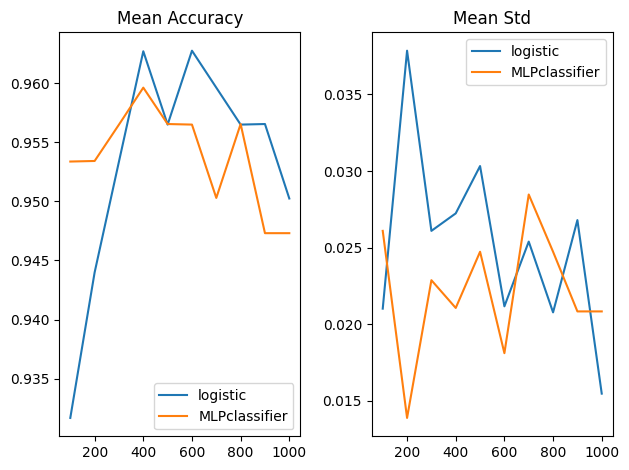

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (meanax, stdax) = plt.subplots(ncols=2)

meandf = pd.DataFrame(meanscores)
meandf.plot(kind="line", ax=meanax)
meanax.set_title("Mean Accuracy")
stddf = pd.DataFrame(stdscores)
stddf.plot(kind="line", ax=stdax)
stdax.set_title("Mean Std")
fig.tight_layout()

As we can see, the performance improves as the number of genes increases until around 300 genes, at which point the the performance starts to decrease. This is somewhat expected, as some features are required to make a good classification, but too many can "confuse" the model.